In [83]:
from numpy.random import seed
seed(1)

In [84]:
import os
import tensorflow as tf

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [86]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [87]:
x_df = pd.read_csv("../reduced_data/steam_all_param_merged_nan_removed_newclasses.csv")
x_df.head()

,appid,metascore,recommendations,positive_x,negative_x,developer,publisher,maxccu,success_class,suc_class,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,10,88,100006.0,169280.0,4360.0,Valve,Valve,31930,A,1,...,0,0,0,0,0,0,0,0,0,0
1,20,0,3754.0,4628.0,800.0,Valve,Valve,236,F,0,...,0,0,0,0,0,0,0,0,0,0
2,30,79,2779.0,4527.0,493.0,Valve,Valve,364,F,0,...,0,0,0,0,0,0,0,0,0,0
3,40,0,1276.0,1651.0,353.0,Valve,Valve,629,F,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,8162.0,9938.0,520.0,Gearbox Software,Valve,620,F,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
x_df["developer"]=x_df["developer"].astype("category")
x_df["developer"]=x_df["developer"].cat.codes
x_df["publisher"]=x_df["publisher"].astype("category")
x_df["publisher"]=x_df["publisher"].cat.codes
x_df.head()

,appid,metascore,recommendations,positive_x,negative_x,developer,publisher,maxccu,success_class,suc_class,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,10,88,100006.0,169280.0,4360.0,18255,15348,31930,A,1,...,0,0,0,0,0,0,0,0,0,0
1,20,0,3754.0,4628.0,800.0,18255,15348,236,F,0,...,0,0,0,0,0,0,0,0,0,0
2,30,79,2779.0,4527.0,493.0,18255,15348,364,F,0,...,0,0,0,0,0,0,0,0,0,0
3,40,0,1276.0,1651.0,353.0,18255,15348,629,F,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,8162.0,9938.0,520.0,6704,15348,620,F,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
reduced_x = x_df.drop(columns=["positive_x", "negative_x", "appid", "metascore", "recommendations", "maxccu", "success_class",
                              "suc_class", "followers", "positive_y", "negative_y"])
reduced_x

,developer,publisher,maxprice,maxdiscount,totaltags,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,18255,15348,999,90,31989,602,5337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18255,15348,499,90,3123,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18255,15348,499,90,4836,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18255,15348,499,90,1318,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6704,15348,499,90,3163,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31681,7882,6697,99,40,2374,0,0,0,0,0,...,0,0,0,0,0,0,183,0,0,0
31682,3589,5609,99,0,537,20,72,65,0,0,...,0,0,0,0,0,0,0,0,0,0
31683,19968,16855,999,0,2363,0,214,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31684,349,353,0,0,8373,0,0,476,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X = reduced_x
y = x_df["success_class"]
y.head()

0    A
1    F
2    F
3    F
4    F
Name: success_class, dtype: object

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [92]:
X_train.shape, y_train.shape

((23764, 346), (23764,))

In [93]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [94]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [95]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 2
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded L

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: C
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 1
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded L

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded L

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded L

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 0
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 1
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 0
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded L

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 1
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded L

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded L

Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original C

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 0
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 1
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded L

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 1
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded L

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded L

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: D
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: C
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded L

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: B
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: A
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
-----

Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 2
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
-----

Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 3
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original Class: F
Encoded Label: 4
------------
Original C

In [96]:
y_train_categorical = to_categorical(encoded_y)
y_test_categorical = to_categorical(encoded_y_test)
y_train_categorical[:10]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [186]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(y_train_categorical.shape[1], activation="softmax"))

In [187]:
model.compile(loss="mse",
              optimizer="adam", metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=5)

In [188]:
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_split=0.3,
    callbacks=[es]
)

Epoch 1/100
520/520 - 4s - loss: 0.0823 - accuracy: 0.7723 - val_loss: 0.0366 - val_accuracy: 0.8879
Epoch 2/100
520/520 - 2s - loss: 0.0412 - accuracy: 0.8712 - val_loss: 0.0236 - val_accuracy: 0.9296
Epoch 3/100
520/520 - 2s - loss: 0.0304 - accuracy: 0.9025 - val_loss: 0.0209 - val_accuracy: 0.9405
Epoch 4/100
520/520 - 2s - loss: 0.0228 - accuracy: 0.9307 - val_loss: 0.0208 - val_accuracy: 0.9463
Epoch 5/100
520/520 - 2s - loss: 0.0194 - accuracy: 0.9456 - val_loss: 0.0208 - val_accuracy: 0.9463
Epoch 6/100
520/520 - 2s - loss: 0.0187 - accuracy: 0.9482 - val_loss: 0.0209 - val_accuracy: 0.9461
Epoch 7/100
520/520 - 2s - loss: 0.0183 - accuracy: 0.9499 - val_loss: 0.0205 - val_accuracy: 0.9466
Epoch 8/100
520/520 - 2s - loss: 0.0182 - accuracy: 0.9497 - val_loss: 0.0211 - val_accuracy: 0.9459
Epoch 9/100
520/520 - 1s - loss: 0.0180 - accuracy: 0.9507 - val_loss: 0.0208 - val_accuracy: 0.9466
Epoch 10/100
520/520 - 1s - loss: 0.0178 - accuracy: 0.9512 - val_loss: 0.0208 - val_accura

In [189]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 10)                3470      
_________________________________________________________________
batch_normalization_10 (Batc (None, 10)                40        
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 5)                 55        
Total params: 3,565
Trainable params: 3,545
Non-trainable params: 20
_________________________________________________________________


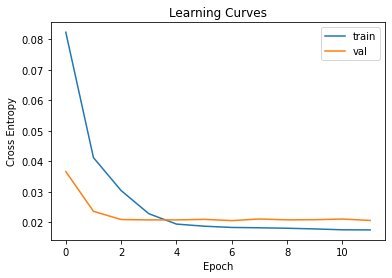

In [190]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [191]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

248/248 - 0s - loss: 0.0197 - accuracy: 0.9489
Loss: 0.019695403054356575, Accuracy: 0.9488765597343445
